In [1]:
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt

from scipy.stats import triang
from scipy.stats import skewnorm
from scipy.stats import uniform

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

In [ ]:
df.head()

,Country,Lower,Middle,Upper,Skew
0,China,202187,338854,407392,Upper
1,India,353884,474194,594503,Mid
2,South Korea,30620,36078,47010,Lower
3,Canada,24200,28110,32021,Mid
4,Vietnam,28819,34426,40034,Mid


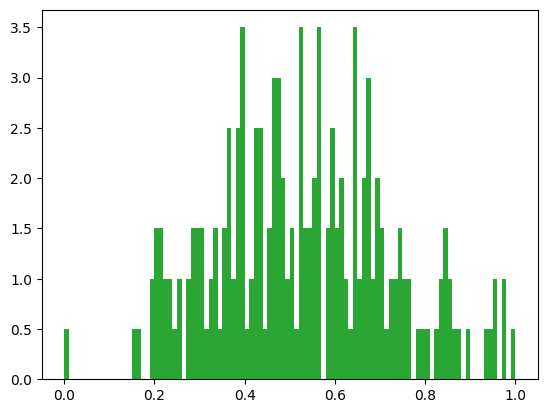

In [ ]:

# Push Distribution Prototype

push_numbers = skewnorm.rvs(a=0, size=200)

push_numbers = push_numbers - min(push_numbers)      #Shift the set so the minimum value is equal to zero.
push_numbers = push_numbers / max(push_numbers)      #Standadize all the vlues between 0 and 1.
push_numbers = push_numbers * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_numbers,100,density=True, color = '#29A634', alpha=1)
plt.show()

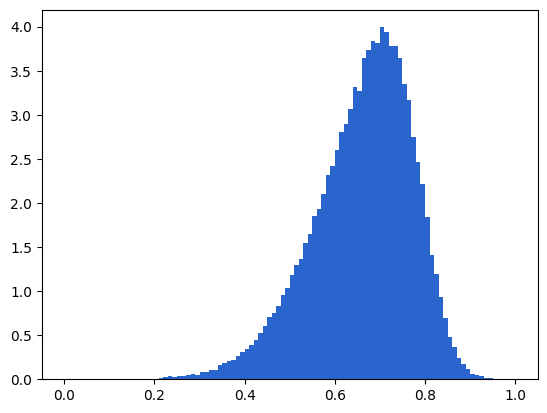

In [ ]:
# Pull Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -3   #Negative values are left skewed, positive values are right skewed.

pull_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

pull_alternate = pull_alternate - min(pull_alternate)      #Shift the set so the minimum value is equal to zero.
pull_alternate = pull_alternate / max(pull_alternate)      #Standadize all the vlues between 0 and 1.
pull_alternate = pull_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(pull_alternate,100,density=True, color = '#2965CC', alpha=1)
plt.show()

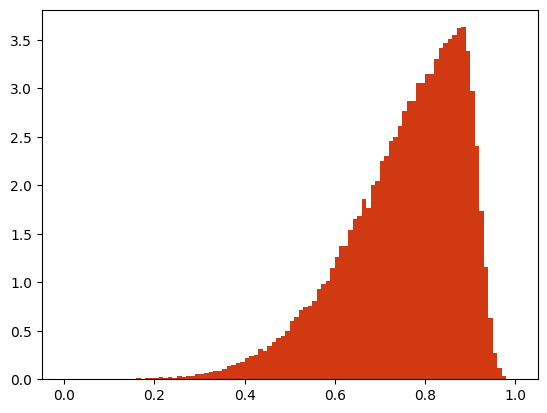

In [ ]:
# Disruption Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -10   #Negative values are left skewed, positive values are right skewed.

disrupt_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

disrupt_alternate = disrupt_alternate - min(disrupt_alternate)      #Shift the set so the minimum value is equal to zero.
disrupt_alternate = disrupt_alternate / max(disrupt_alternate)      #Standadize all the vlues between 0 and 1.
disrupt_alternate = disrupt_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt_alternate,100,density=True, color = '#D13913', alpha=1)
plt.show()

## Three Way Monte Carlo - Push, Pull, Disruption

In [ ]:
def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals, middle_confidence_intervals, num_simulations):
    global_distribution = []
    num_countries = len(lower_confidence_intervals)

    for j in range(num_simulations):
        country_sums = []

        # pull and disruption numbers
        pull_numbers = skewnorm.rvs(a=-5, size=num_simulations) # right
        disruption_numbers = skewnorm.rvs(a=10, size=num_simulations)

        for i in range(num_countries):

          # push numbers / uniform distribution, not skewnorm
          push_numbers = uniform.rvs(loc=0, scale=num_countries)


          # define the pull and disruption numbers for each simulation
          pull_number = pull_numbers[j]
          disruption_number = disruption_numbers[j]

          # weighted number
          weighted_number = (1 * push_numbers[i]) + (0.0 * pull_number) + (0.0 * disruption_number)


          # define the lower, middle, upper values of the country's distribution
          lower = lower_confidence_intervals[i]
          upper = upper_confidence_intervals[i]
          middle = middle_confidence_intervals[i]


          # using the weighted number to pick out a number from the country's distribution (instead of picking out a random number)
          cdf_lower = 0.025
          cdf_middle = 0.5
          cdf_upper = 0.975

          # Using linear interpolation to pick out the point based on the percentile
          # performing interpolation in a way such that the final global distribution will be upper skewed
          if weighted_number <= cdf_lower:
            picked_point = np.interp(weighted_number, [0,cdf_lower], [upper, middle])
          elif weighted_number >=cdf_upper:
            picked_point = np.interp(weighted_number, [cdf_upper, 1], [middle, lower])
          else:
            picked_point = np.interp(weighted_number, [cdf_lower, cdf_upper], [upper, lower])


          country_sums.append(picked_point)


        # Sum the volumes from all countries
        global_distribution.append(sum(country_sums))

    return global_distribution

In [ ]:
#1000 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], num_simulations=1000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)


IndexError: invalid index to scalar variable.

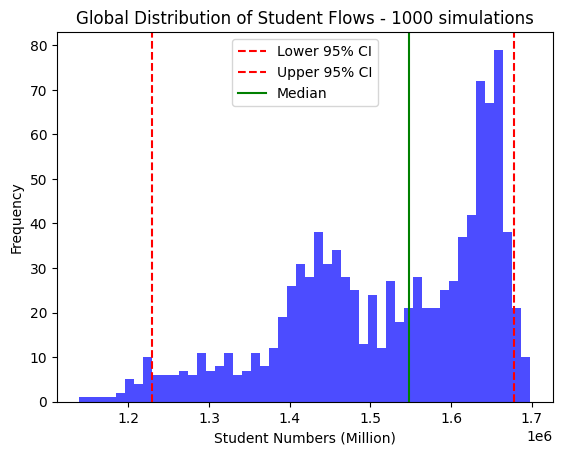

In [ ]:
# Create a histogram chart for the global distribution - 1000 sims

plt.hist(global_distribution, bins=50, color='blue', alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('Global Distribution of Student Flows - 1000 simulations')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
#1M iterations

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], num_simulations=1000000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Upper global confidence interval:", upper_global_ci)
print("Median global volume:", median_global_volume)

KeyboardInterrupt: 

In [ ]:
# Create a histogram chart for the global distribution - 1M sims

plt.hist(global_distribution, bins=50, color='blue', alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('Global Distribution of Student Flows - 1M simulations')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()